# The Sparks Foundation : Data Science and Business Analytics Internship

# Author : Ankur Shukla

# Task_1 : Exploratory Data Analysis - Linear Regression

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
# reading the dataset
data = pd.read_csv('student_scores.csv')

In [3]:
# first five rows of the data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# last five rows of the data 
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
data.shape

(25, 2)

In [6]:
# columns in the dataset
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
# statistics of the numerical features in the data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
# overview of type of variables
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [9]:
# checking the missing values in the dataset
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

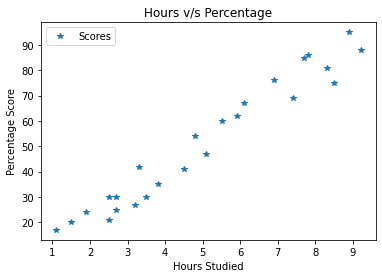

In [10]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours v/s Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied & percentage of score.

In [11]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [12]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [13]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


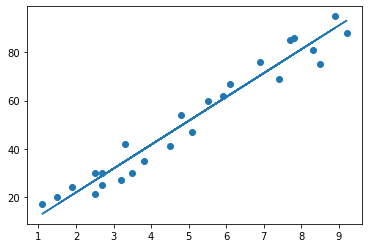

In [14]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [15]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [16]:
# Comparing Actual vs Predicted
dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
dataframe

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


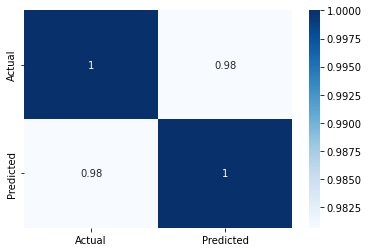

In [17]:
sns.heatmap(dataframe.corr(),annot = True ,cmap="Blues")
plt.show()

As we see the data is highly correlated,Thats why the results obtained will be of good accuracy.

## Histogram Plots

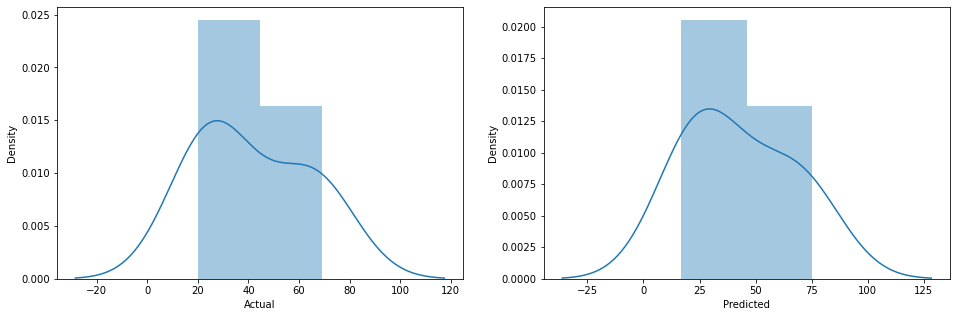

In [18]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(dataframe['Actual'])
plt.subplot(1,2,2)
sns.distplot(dataframe['Predicted'])
plt.show()

Text(0.5, 1.0, 'Data Distribution of Score')

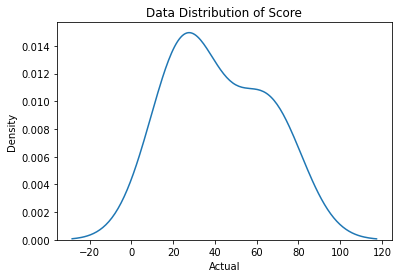

In [19]:
sns.kdeplot(dataframe['Actual'])
plt.title('Data Distribution of Score')

Text(0.5, 1.0, 'Data Distribution of Hours')

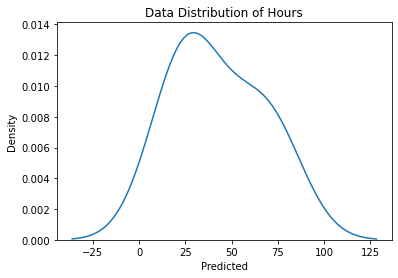

In [20]:
sns.kdeplot(dataframe['Predicted'])
plt.title('Data Distribution of Hours')

## Box plot

<AxesSubplot:xlabel='Predicted'>

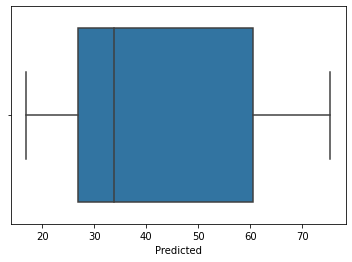

In [21]:
sns.boxplot(dataframe['Predicted'])

<AxesSubplot:xlabel='Actual'>

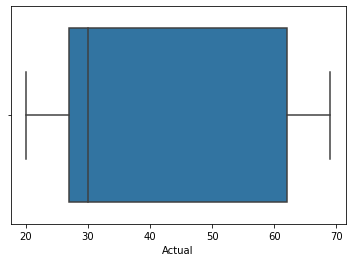

In [22]:
sns.boxplot(dataframe['Actual'])

The Dataset doesn't have any extreme values As we didnt get any outlier while analysing box plot

 ### **Evaluating the Linear Regression model**

In [23]:
from sklearn import metrics 
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [24]:
# creating the model
lreg = LinearRegression()

In [25]:
# training the model
lreg.fit(X_test, y_test)

LinearRegression()

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [27]:
# rmse on training set
pred_train = lreg.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
rmse_train

6.537355929455621

In [28]:
# rmse on validation set
pred_val = lreg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred_val))
rmse

3.8935887014542665

## Joint Plot

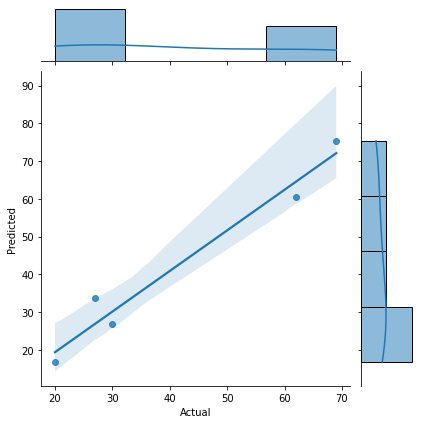

In [29]:
sns.jointplot(dataframe['Actual'] , dataframe['Predicted'] , kind = "reg")
plt.show()

By this Joint point we would clearly understand the relationship between two variables as well as the individual distribution of each variable.

## End of the Task